In [41]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [42]:
X=np.array([[2,3],
           [5.6, 7.8],
           [3, 4],
           [9, 7],
           [3, 1],
           [1, 2]])

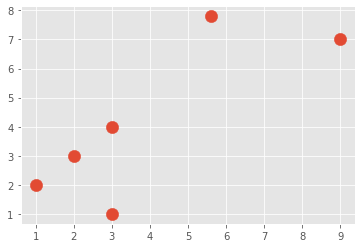

In [43]:
plt.scatter(X[:,0],X[:,1], s=150)
plt.show()

In [44]:
colors=10*["g","r","c","b", "k"]

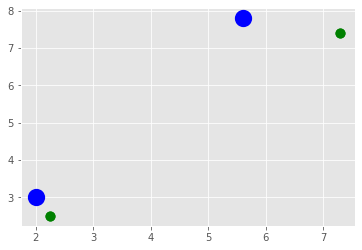

In [47]:
class K_mean:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k=k
        self.tol=tol
        self.max_iter=max_iter

    def fit(self, data):
        self.centroids={}
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i]=[]
            for feature in X:
                distances=[np.linalg.norm(feature - self.centroids[centroid]) for centroid in self.centroids]
                classification=distances.index(min(distances))
                self.classifications[classification].append(feature)
                
            previous_centroid=dict(self.centroids)
            
            for classification in self.classifications:
                self.classifications[classification]=np.average(self.classifications[classification], axis=0)
            optimize=True
            
            for c in self.centroids:
                original_centroid=previous_centroid[c]
                current_centroid=self.centroids[c]
                if np.sum((current_centroid - original_centroid)/original_centroid*100.0) > self.tol:
                    optimize=False
            if optimize:
                break
                
    
    def predict(self, data):
        distances=[np.linalg.norm(feature - self.centroids[centroid]) for centroid in self.centroids]
        classification=distances.index(min(distances)) 
        return classification

clf=K_mean()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', color='b', s=150, linewidths=5)

for classification in clf.classifications:
        
        for feature in clf.classifications:
            classification=clf.predict(feature)
            plt.scatter(clf.classifications[feature][0], clf.classifications[feature][1], color=colors[classification], s=25, linewidths=5)
         
        
    
    

In [ ]:
X=np.array([[3, 6],
           [7,2],
           [5, 9],
           [1,6]])

for unknown in X:
    classification=clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], color=color[classification], s=150, linewidths=5)